In [15]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [58]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/'
x1ds = glob.glob('{}*x1d.fits'.format(path))
x1ds

['/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo01010_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo01020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo02020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo03010_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo05010_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo13010_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo13020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo13030_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo16010_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo16020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo17020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/ocy721010_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/ocy721020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oen301010_x1d.fits']

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo01010_x1d.fits
BD-17-588A
G140M
193.15268


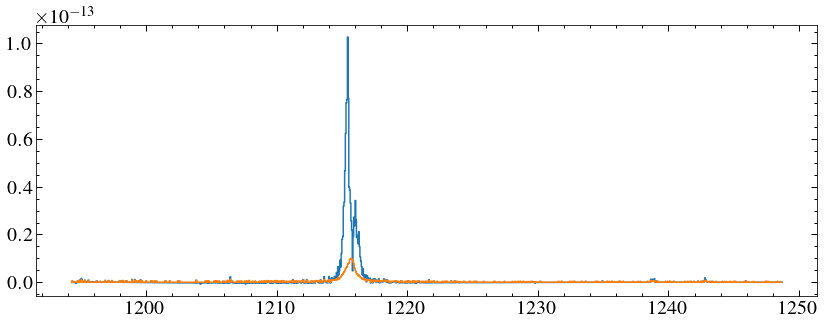

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo01020_x1d.fits
BD-17-588A
G140M
411.88312


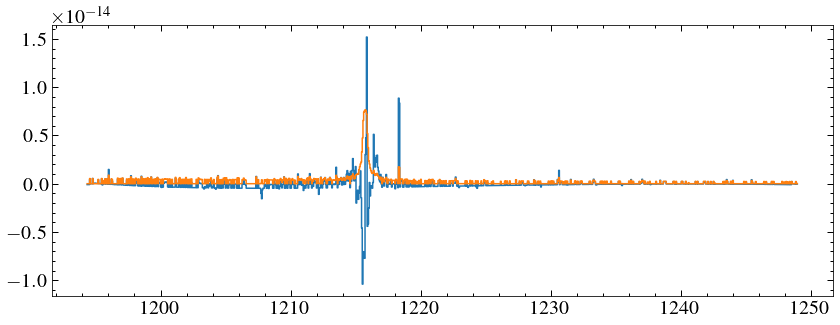

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo02020_x1d.fits
WOLF-437
G140M
500.12775


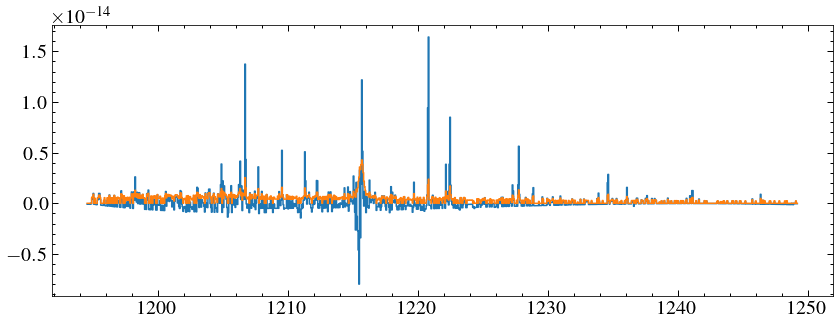

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo03010_x1d.fits
CD-45-5378
G140M
173.27858


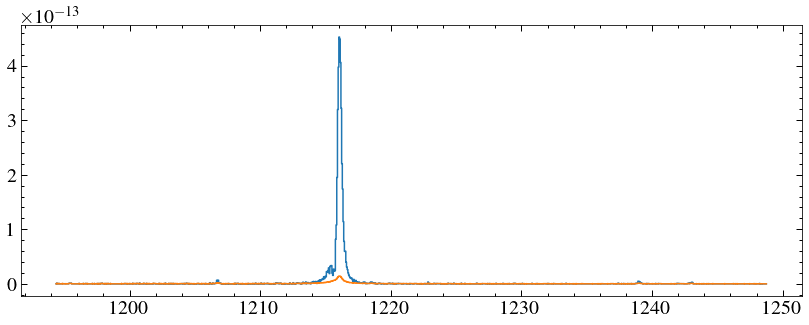

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo05010_x1d.fits
HD-304636
G140M
168.32626


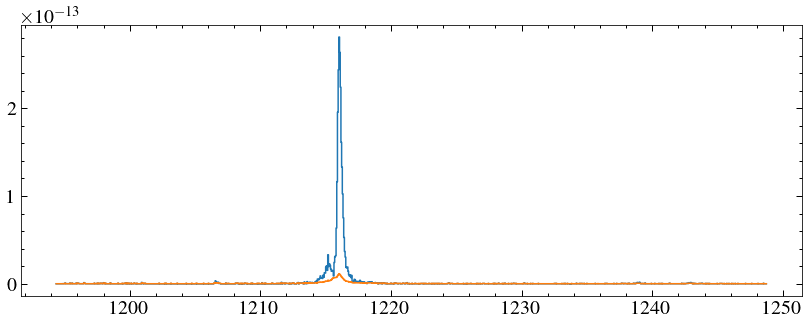

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo13010_x1d.fits
CD-60-8051
G140M
159.60316


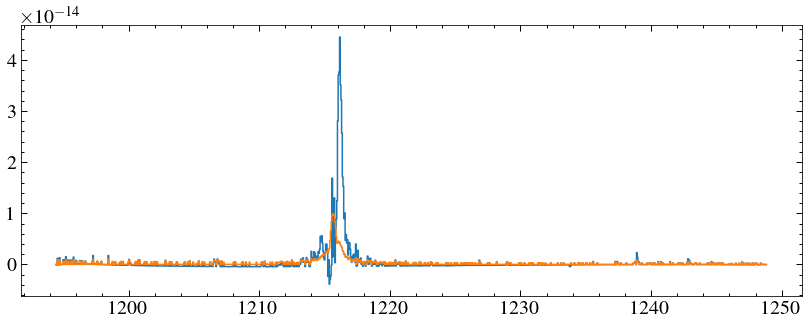

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo13020_x1d.fits
CD-60-8051
G140M
159.9237


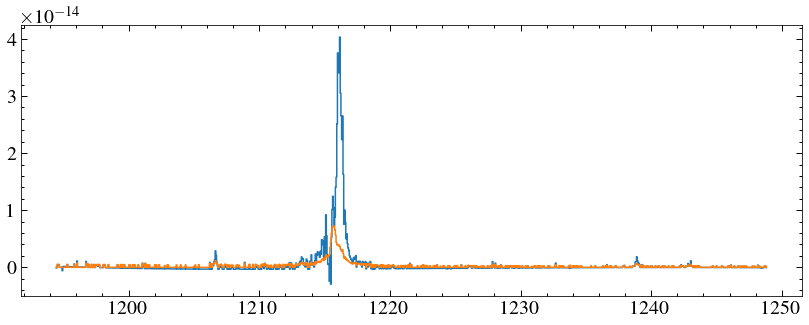

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo13030_x1d.fits
CD-60-8051
G140M
500.03876


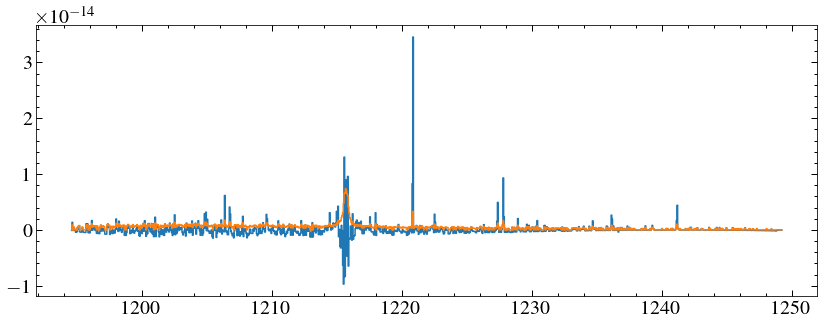

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo16010_x1d.fits
LP-961-53
G140M
152.78192


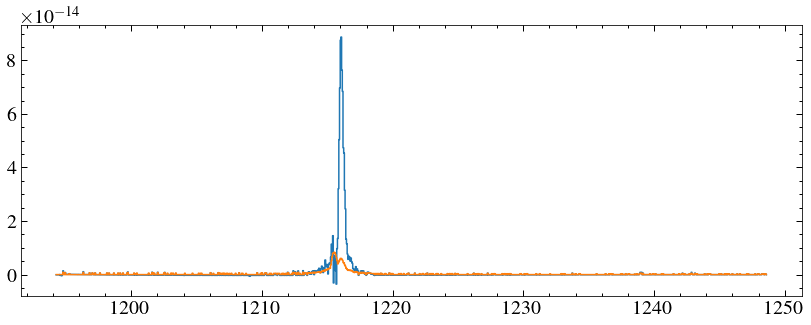

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo16020_x1d.fits
LP-961-53
G140M
153.23633


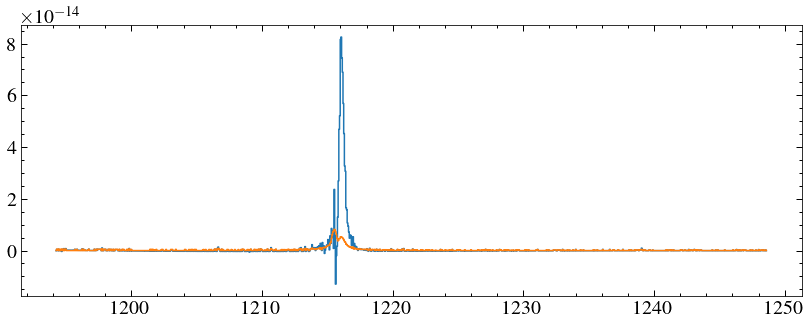

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo17020_x1d.fits
CD-23-12010
G140M
193.58609


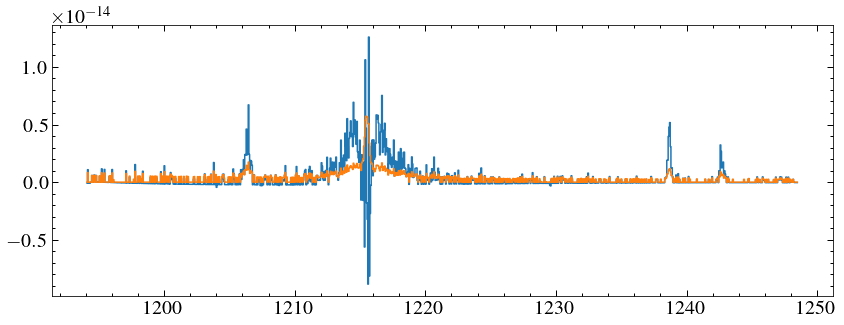

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/ocy721010_x1d.fits
2M11301450+0735180
G140M
556.3479


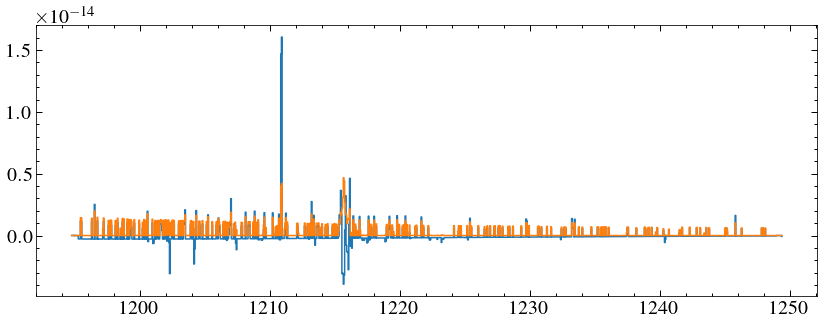

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/ocy721020_x1d.fits
2M11301450+0735180
G140M
554.9332


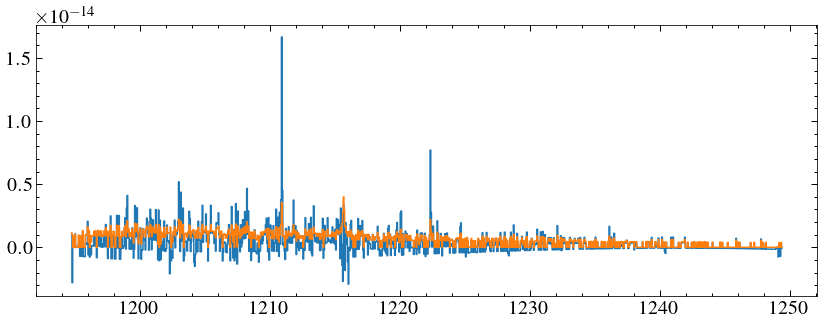

/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oen301010_x1d.fits
BD-14-1137
G140M
872.3185


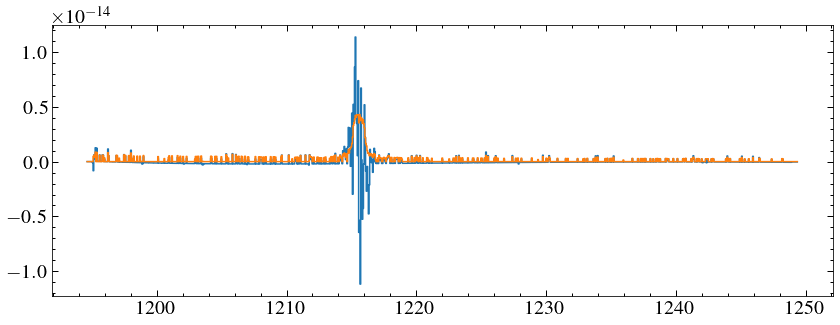

In [57]:
for x in x1ds:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    target = fits.getheader(x, 0)['TARGNAME'] 
    print(target)
    print(grating)
    data = fits.getdata(x, 1)[0]
 
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating in ['G140M', 'G140L']:
        mask = (w > 1160)
    if grating =='G230L':
        mask = (w > 1700)
    if grating =='G430L':
        mask = (w > 3000)
    
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
    plt.show()
    

In [19]:
import stistools
os.environ['oref'] = path 

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


In [68]:
# roots = ['oeoo01020', 'oeoo02020', 'ocy721010', 'ocy721020']
# a2s = [193, 157, 385, 385]

roots = ['oen301010']
a2s = [395]

for root, a2 in  zip(roots, a2s):

    raw = '{}/{}_flt.fits'.format(path, root)
    rootname = fits.getheader(raw)['ROOTNAME'] 
    outname = 'reextractions/{}_new_x1d.fits'.format(rootname)
    stistools.x1d.x1d(raw, output = outname, trailer='reextractions/{}_new.trl'.format(rootname), a2center=a2, maxsrch=5)

reextractions/oeoo01020_new_x1d.fits
193.22672
BD-17-588A


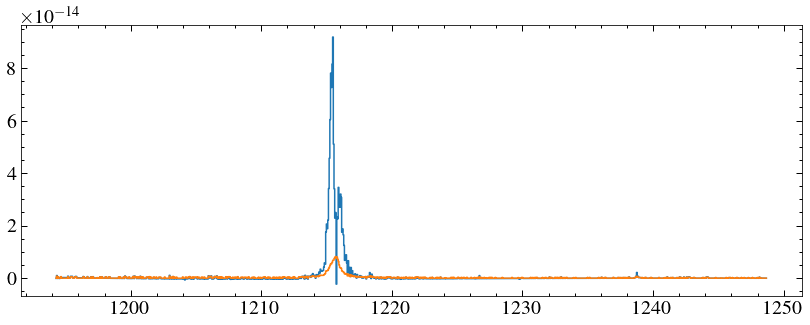

reextractions/ocy721010_new_x1d.fits
390.23047
2M11301450+0735180


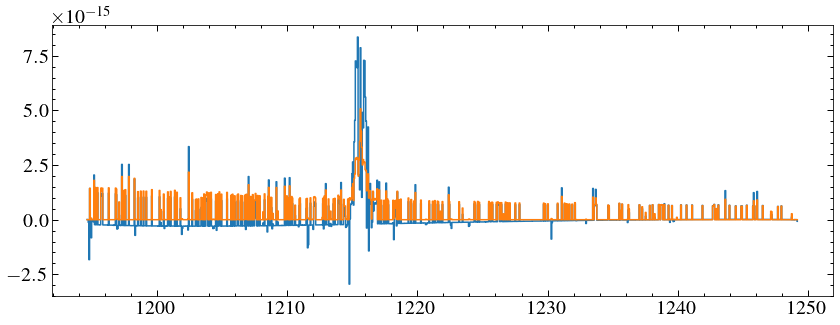

reextractions/oen301010_new_x1d.fits
395.78708
BD-14-1137


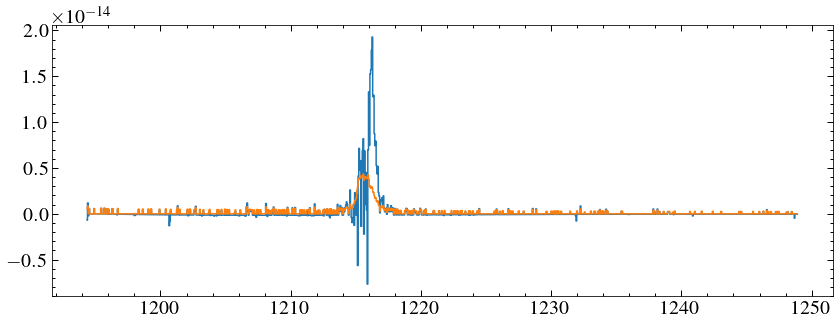

reextractions/oeoo13030_new_x1d.fits
160.35678
CD-60-8051


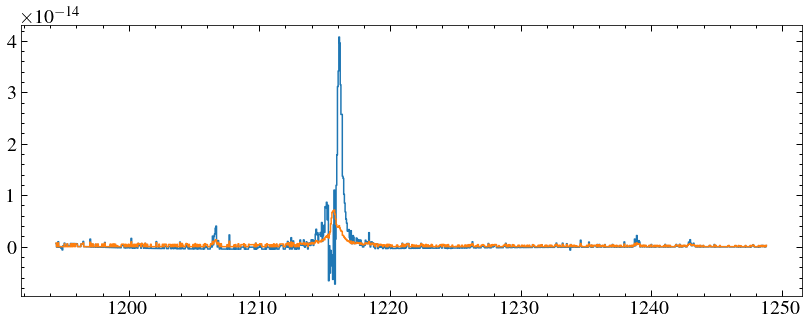

reextractions/oeoo02020_new_x1d.fits
160.41248
WOLF-437


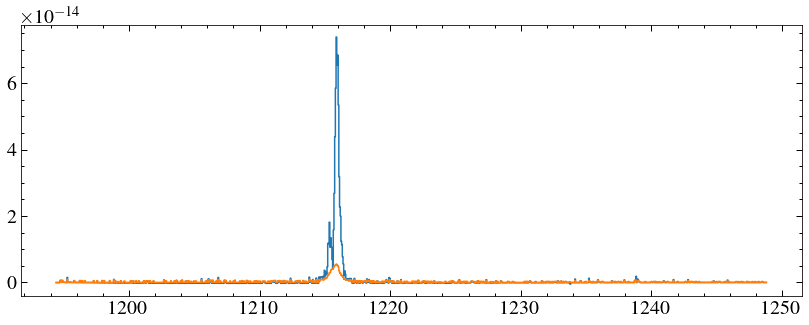

reextractions/ocy721020_new_x1d.fits
389.28027
2M11301450+0735180


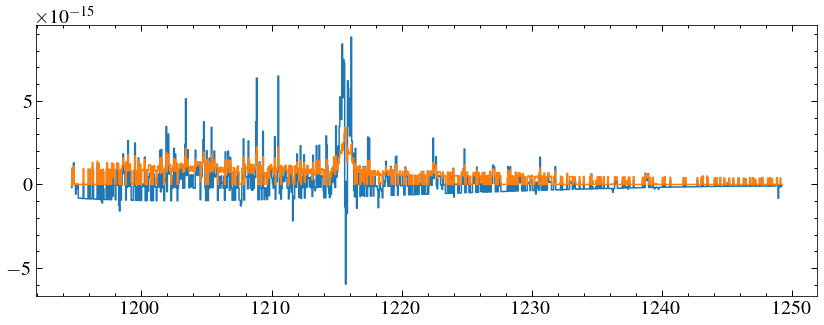

In [69]:
newx1ds = glob.glob('reextractions/*_new_x1d.fits')

for x in newx1ds:
    print(x)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    print(fits.getheader(x, 0)['TARGNAME'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # mask = w > 1700
    # w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
    plt.show()

In [70]:
combined_x1ds = newx1ds
roots = ['oeoo01020', 'oeoo02020', 'ocy721010', 'ocy721020', 'oeoo13030', 'oen301010']

for x in x1ds:
    root = fits.getheader(x, 0)['ROOTNAME']
    if root not in roots:
        combined_x1ds.append(x)
        
print(combined_x1ds)


['reextractions/oeoo01020_new_x1d.fits', 'reextractions/ocy721010_new_x1d.fits', 'reextractions/oen301010_new_x1d.fits', 'reextractions/oeoo13030_new_x1d.fits', 'reextractions/oeoo02020_new_x1d.fits', 'reextractions/ocy721020_new_x1d.fits', '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo01010_x1d.fits', '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo03010_x1d.fits', '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo05010_x1d.fits', '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo13010_x1d.fits', '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo13020_x1d.fits', '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo16010_x1d.fits', '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo16020_x1d.fits', '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo17020_x1d.fits']


In [71]:
stars = []
for x in combined_x1ds:
    star = fits.getheader(x, 0)['TARGNAME']
    stars.append(star)
stars = np.unique(stars)
stars

array(['2M11301450+0735180', 'BD-14-1137', 'BD-17-588A', 'CD-23-12010',
       'CD-45-5378', 'CD-60-8051', 'HD-304636', 'LP-961-53', 'WOLF-437'],
      dtype='<U18')

In [72]:
def spectra_adder(f_array, e_array, scale_correct=True):
    """
    Returns a variance-weighted coadd with standard error of the weighted mean (variance weights, scale corrected).
    f_array and e_arrays are collections of flux and error arrays, which should have the same lenth and wavelength scale
    """
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1) #reduced chi-squared
    if scale_correct:
        error = (var * rcs)**0.5
    else:
        error = var**2
    return flux,error

2M11301450+0735180
2
['reextractions/ocy721010_new_x1d.fits', 'reextractions/ocy721020_new_x1d.fits']
['ocy721010', 'ocy721020']


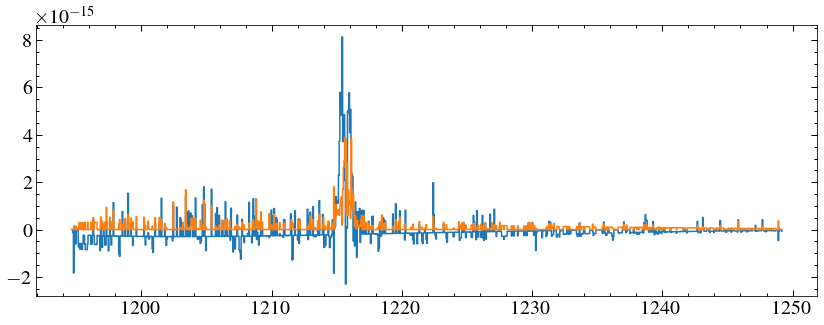

BD-14-1137
1
['reextractions/oen301010_new_x1d.fits']
['oen301010']


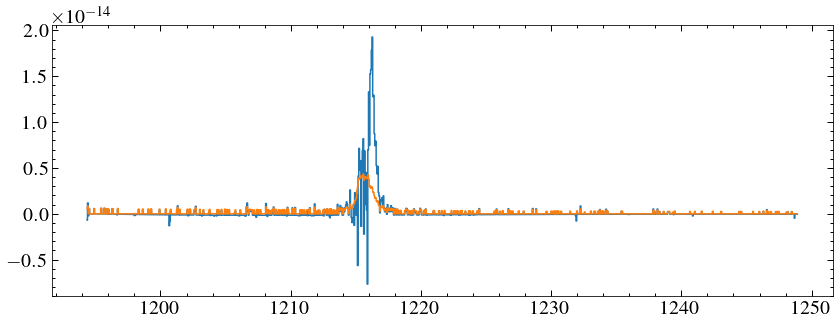

BD-17-588A
2
['reextractions/oeoo01020_new_x1d.fits', '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo01010_x1d.fits']
['oeoo01020', 'oeoo01010']


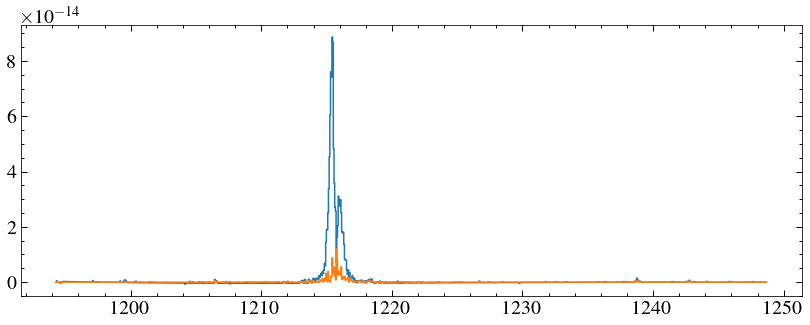

CD-23-12010
1
['/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo17020_x1d.fits']
['oeoo17020']


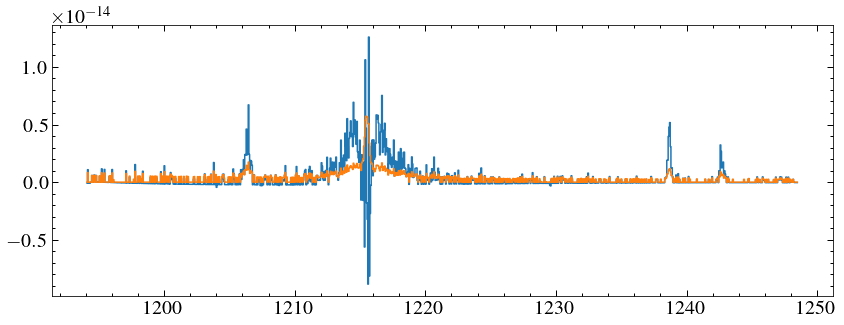

CD-45-5378
1
['/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo03010_x1d.fits']
['oeoo03010']


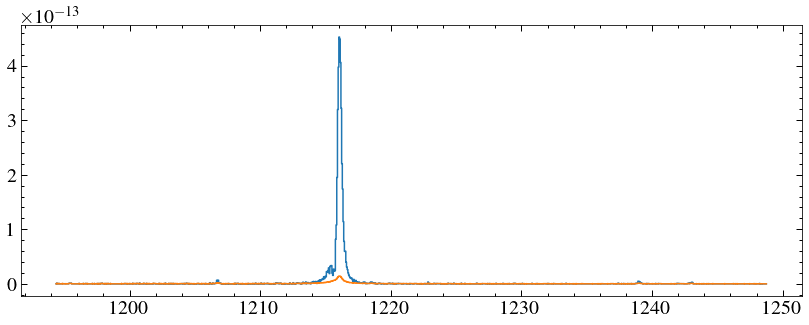

CD-60-8051
3
['reextractions/oeoo13030_new_x1d.fits', '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo13010_x1d.fits', '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo13020_x1d.fits']
['oeoo13030', 'oeoo13010', 'oeoo13020']


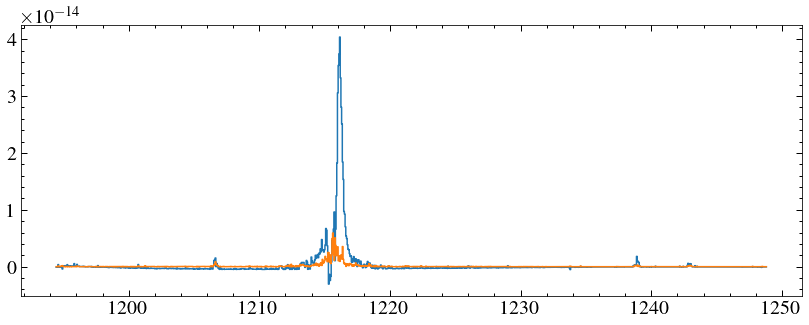

HD-304636
1
['/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo05010_x1d.fits']
['oeoo05010']


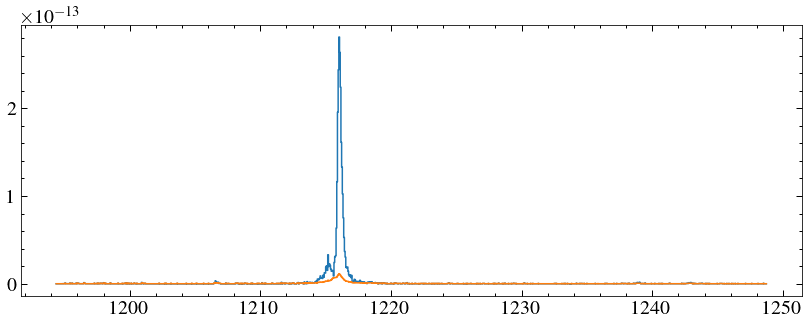

LP-961-53
2
['/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo16010_x1d.fits', '/media/david/2tb_ext_hd/hddata/meats/hst/g140m/oeoo16020_x1d.fits']
['oeoo16010', 'oeoo16020']


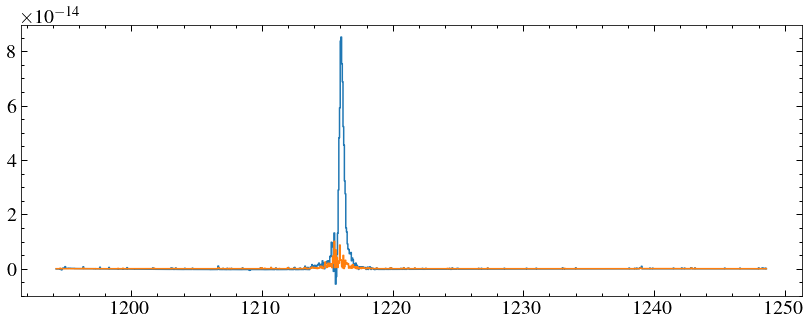

WOLF-437
1
['reextractions/oeoo02020_new_x1d.fits']
['oeoo02020']


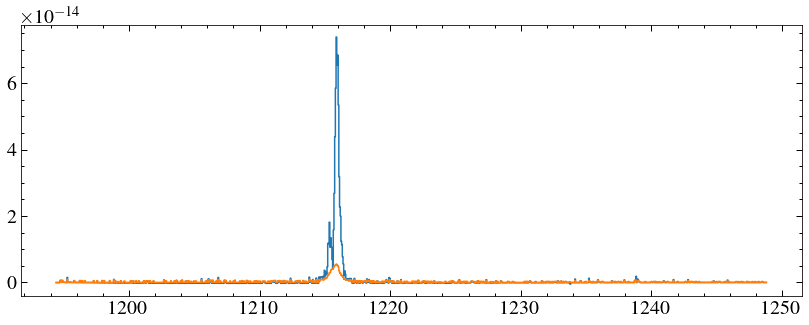

In [73]:
for star in stars:
    print(star)
    star_x = []
    n=0
    roots = []
    for x in combined_x1ds:
        if fits.getheader(x, 0)['TARGNAME'] == star:
            star_x.append(x)
    print(len(star_x))
    print(star_x)
    if len(star_x) ==1:
        data = fits.getdata(star_x[0], 1)[0]
        w_lya, f_lya, e_lya= data['WAVELENGTH'], data['FLUX'], data['ERROR']
        roots.append(fits.getheader(star_x[0], 0)['ROOTNAME'])
    else:
        
        f_lya = []
        e_lya = []
   
        for x in star_x:
            # if fits.getheader(x, 0)['TARGNAME'] == star:
            data = fits.getdata(x, 1)[0]
            roots.append(fits.getheader(x, 0)['ROOTNAME'])
            w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
            # grating = fits.getheader(x, 0)['OPT_ELEM']
            # if grating == 'G230L':
            # mask = (w > 1600) & (w <3130)
            # w, f, e = w[mask], f[mask], e[mask]
            if n == 0:
                w_lya = w
                f_lya.append(f)
                e_lya.append(e)
            else:
                f_lya.append(interp1d(w, f, fill_value='extrapolate')(w_lya))
                e_lya.append(interp1d(w, e, fill_value='extrapolate')(w_lya))            
            n +=1
        f_lya, e_lya = spectra_adder(np.array(f_lya), np.array(e_lya), scale_correct=True)
    plt.step(w_lya, f_lya, where='mid')
    plt.step(w_lya, e_lya, where='mid')
    print(roots)
    newdata = Table([w_lya*u.AA, f_lya*u.erg/u.s/u.cm**2/u.AA, e_lya*u.erg/u.s/u.cm**2/u.AA], names=['WAVELENGTH', 'FLUX', 'ERROR'])
    primary_hdu = fits.PrimaryHDU(header=fits.getheader(x,0))
    hdu = fits.table_to_hdu(newdata)
    hdu.name='SPECTRUM'
    root_hdu = fits.table_to_hdu(Table([roots], names=['ROOTNAMES']))
    root_hdu.name = 'ROOTNAMES'
    hdul = fits.HDUList([primary_hdu, hdu, root_hdu])
    hdul.writeto('coadds/{}_g140m_coadd.fits'.format(star), overwrite=True)
    
    plt.show()


[('oeoo01020',) ('oeoo01010',)]


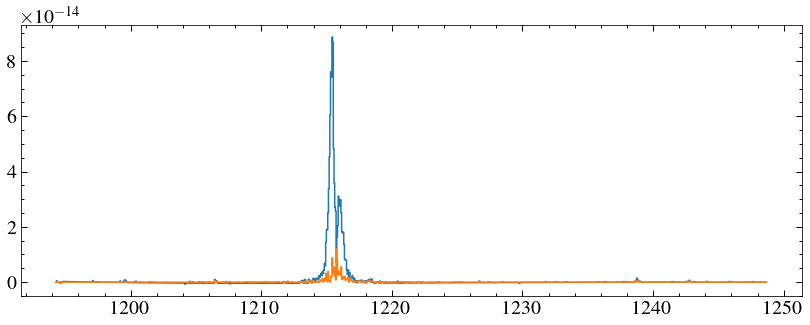

[('oen301010',)]


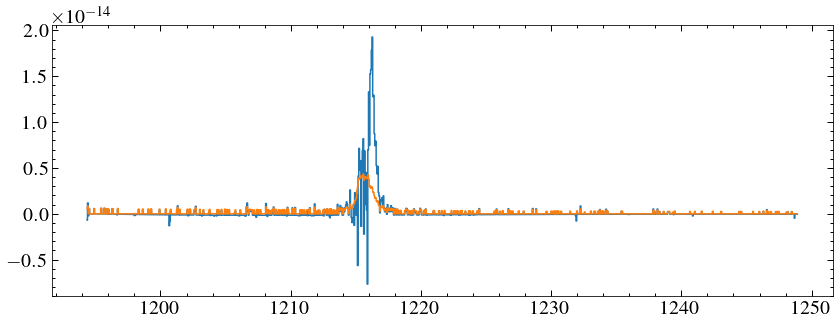

[('oeoo03010',)]


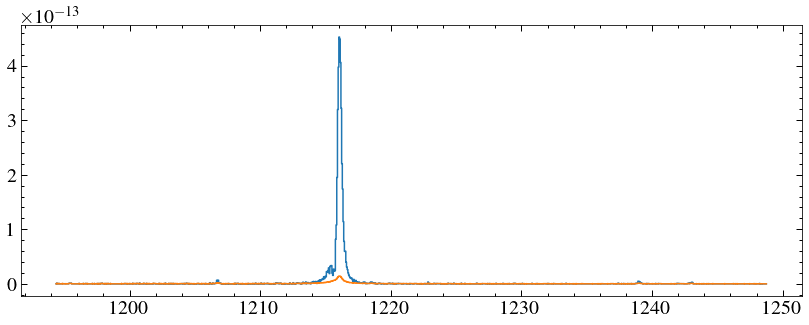

[('oeoo02020',)]


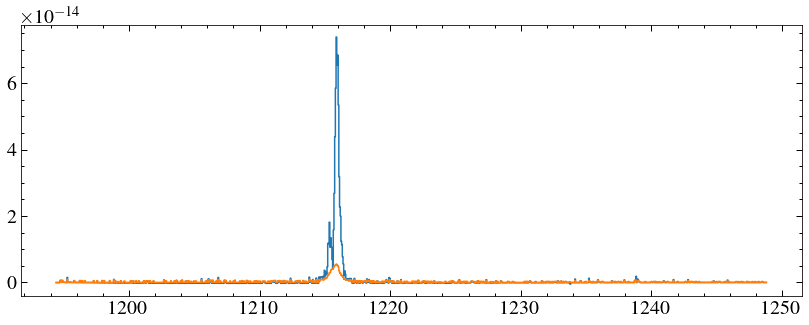

[('oeoo17020',)]


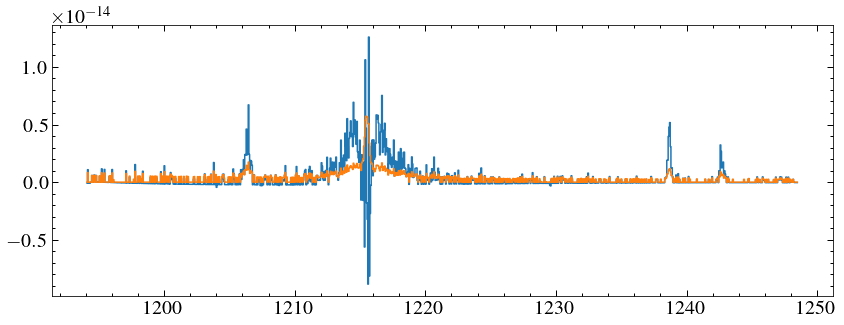

[('oeoo05010',)]


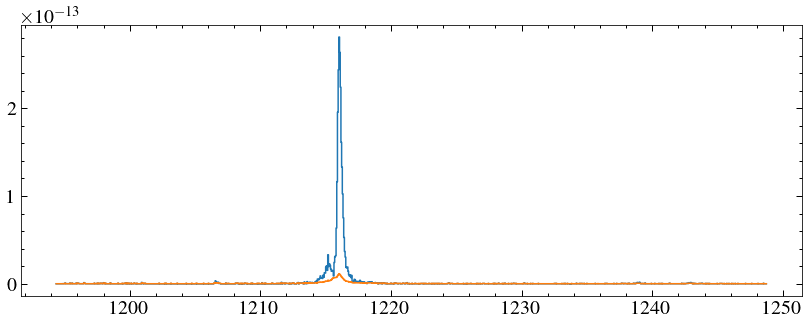

[('ocy721010',) ('ocy721020',)]


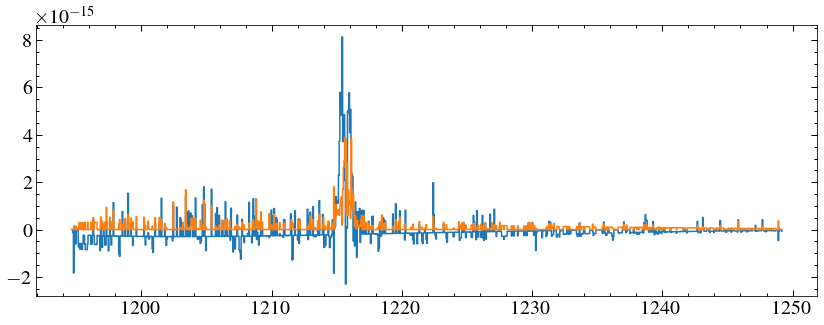

[('oeoo13030',) ('oeoo13010',) ('oeoo13020',)]


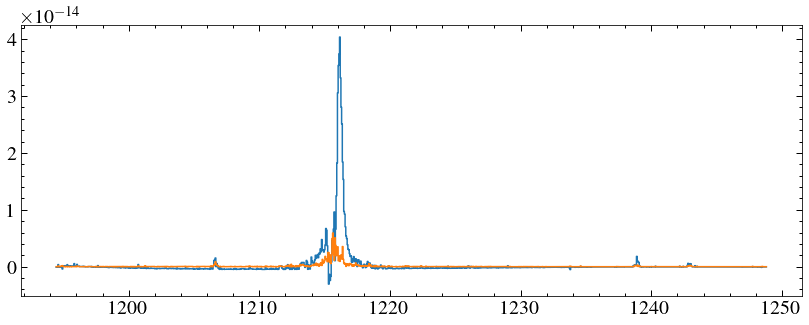

[('oeoo16010',) ('oeoo16020',)]


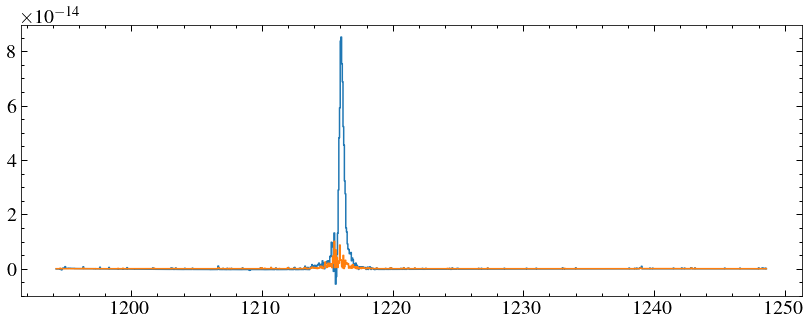

In [74]:
coadds = glob.glob('coadds/*.fits')
for x in coadds:
    
    data = fits.getdata(x, 1)
    roots = fits.getdata(x,2)
    print(roots)


    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
    plt.show()